### Ultralytics Yolo v3 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (6667/6667), done.


In [2]:
!cd yolov3;pip install -qr requirements.txt

     |████████████████████████████████| 636 kB 7.4 MB/s 


In [3]:
!cat yolov3/requirements.txt

# pip install -r requirements.txt

# base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow
PyYAML>=5.3.1
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# logging -------------------------------------
tensorboard>=2.4.1
# wandb

# plotting ------------------------------------
seaborn>=0.11.0
pandas

# export --------------------------------------
# coremltools>=4.1
# onnx>=1.9.0
# scikit-learn==0.19.2  # for coreml quantization

# extras --------------------------------------
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
pycocotools>=2.0  # COCO mAP
thop  # FLOPS computation


In [4]:
from IPython.display import Image, clear_output
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


In [5]:
!nvidia-smi

Tue Aug  3 11:14:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!cd yolov3/data/images;ls -lia

total 656
2384438 drwxr-xr-x 2 root root   4096 Aug  3 11:13 .
2384428 drwxr-xr-x 4 root root   4096 Aug  3 11:13 ..
2384439 -rw-r--r-- 1 root root 487438 Aug  3 11:13 bus.jpg
2384440 -rw-r--r-- 1 root root 168949 Aug  3 11:13 zidane.jpg


### Data 다운로드


In [11]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-08-03 11:25:06--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-08-03 11:25:07 (17.0 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [13]:
# 영상 다운로드 하기
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2021-08-03 11:28:07--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-03 11:28:07--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-03 11:28:07--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

# 이미지 Detection Inference

In [8]:
## --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨. 
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함. 
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

100% 118M/118M [00:02<00:00, 45.7MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.067s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.025s)
Results saved to runs/detect/exp
Done. (0.297s)


In [9]:
# 결과가 runs/detect/exp에 저장됨
!ls -lia ./yolov3/runs/detect/exp

total 748
2384503 drwxr-xr-x 2 root root   4096 Aug  3 11:18 .
2384502 drwxr-xr-x 3 root root   4096 Aug  3 11:18 ..
2384506 -rw-r--r-- 1 root root 496310 Aug  3 11:18 bus.jpg
2384507 -rw-r--r-- 1 root root 255505 Aug  3 11:18 zidane.jpg


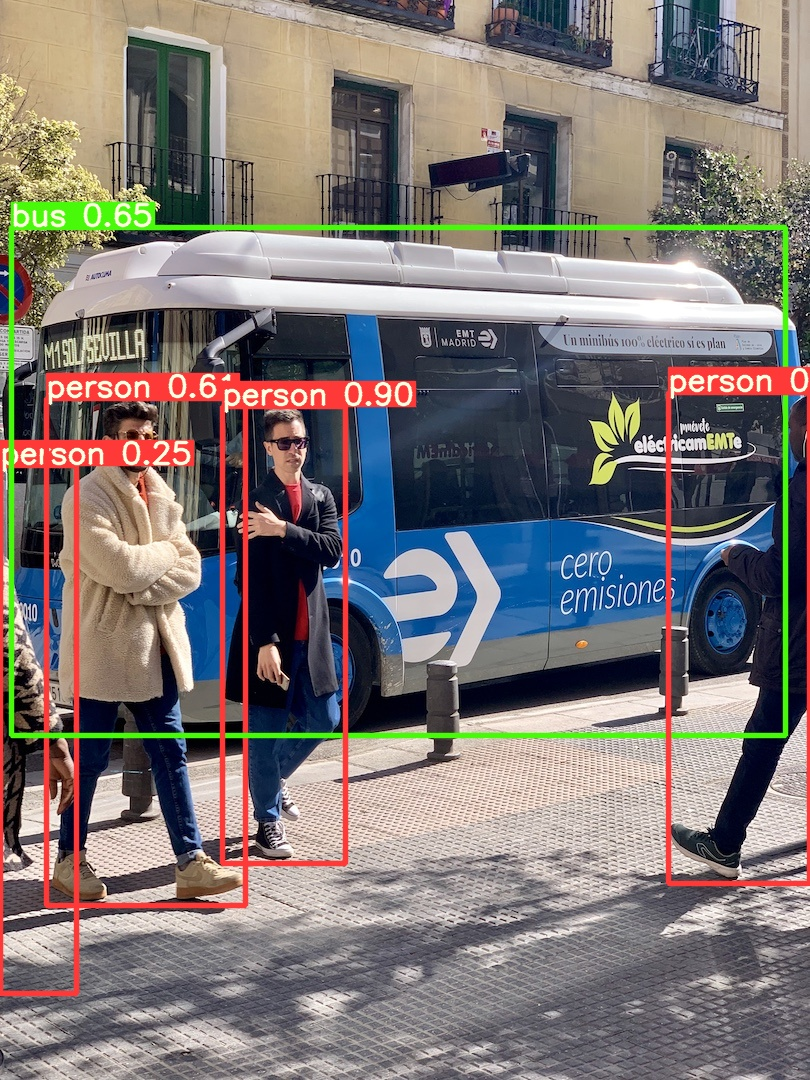

In [10]:
Image(filename='/content/yolov3/runs/detect/exp/bus.jpg', width=600)

In [12]:
!cd yolov3;python detect.py --weight yolov3.pt --img 600 --conf 0.25 --source /content/data/beatles01.jpg \
--project /content/data --name=run_imge --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=600, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_imge', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/beatles01.jpg', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 480x608 5 persons, 11 cars, 1 truck, 1 tie, 1 baseball bat, Done. (0.027s)
Results saved to /content/data/run_imge
Done. (0.054s)


* Video Detect

In [ ]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장.  
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1